In [1]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import r_regression, SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
train_X = pd.DataFrame(np.load('X_train.npy'))
train_Y = pd.DataFrame(np.load('Y_train.npy'))
test_X = pd.DataFrame(np.load('X_test.npy'))
test_Y = pd.DataFrame(np.load('Y_test.npy'))

# Impute missing values
imputer = IterativeImputer(random_state=42)
train_X_imputed = imputer.fit_transform(train_X)
test_X_imputed = imputer.transform(test_X) 
"""IterativeImputer is a module used to provide multivariate imputation to estimate each feature from all the others, it does this to input missing
feature values as a function of other features ina  round-robin fashion."""

# Convert the imputed data into dataframes 
train_X_imputed = pd.DataFrame(train_X_imputed, columns=train_X.columns)
test_X_imputed = pd.DataFrame(test_X_imputed, columns=test_X.columns)


In [3]:
# Normalization
minMaxScaler = MinMaxScaler(feature_range=(-1, 1))
train_X_normalized = minMaxScaler.fit_transform(train_X_imputed)
test_X_normalized = minMaxScaler.transform(test_X_imputed)  

In [4]:
# Normalization
minMaxScaler2 = MinMaxScaler(feature_range=(10, 15))
train_X_normalized2 = minMaxScaler2.fit_transform(train_X_imputed)
test_X_normalized2 = minMaxScaler2.transform(test_X_imputed)  
"""MinMaxScaler transforms the features in a data set to be within a given range, in this case -1 to 1. This scales all data, including outliers,
down to a fixed range which cna be mroe easily managed."""

'MinMaxScaler transforms the features in a data set to be within a given range, in this case -1 to 1. This scales all data, including outliers,\ndown to a fixed range which cna be mroe easily managed.'

Training Accuracy: 0.9872222222222222
Testing Accuracy: 0.9196296296296296


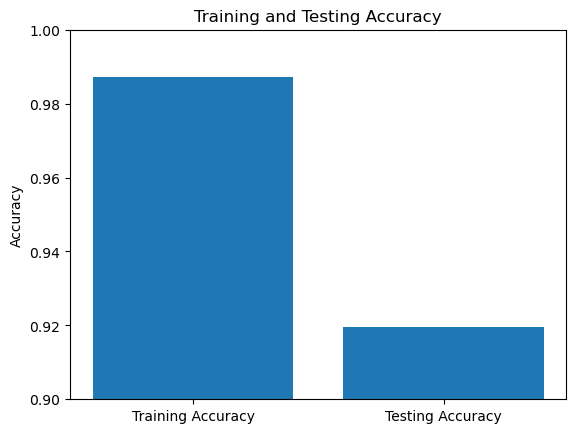

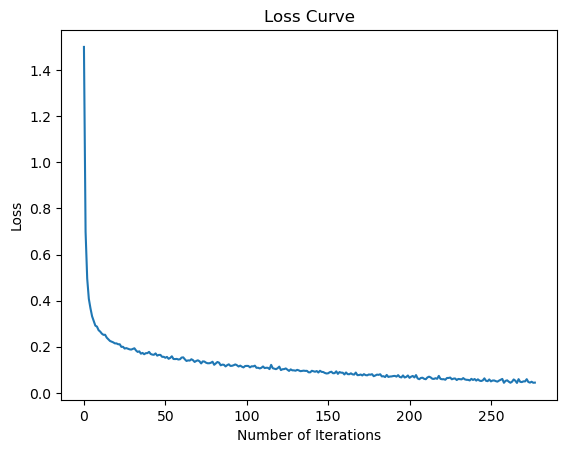

In [5]:
# Initialize the MLPClassifier
multiLayerPerceptron = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)

# Train the model
multiLayerPerceptron.fit(train_X_normalized, train_Y.values.ravel()) 

multiLayerPerceptron_scores = cross_val_score(multiLayerPerceptron, test_X_normalized, test_Y.values.ravel(), cv=10)

# Evaluate the model
training_accuracy = multiLayerPerceptron.score(train_X_normalized, train_Y.values.ravel())
testing_accuracy = multiLayerPerceptron.score(test_X_normalized, test_Y.values.ravel())

print('Training Accuracy:', training_accuracy)
print('Testing Accuracy:', testing_accuracy)

plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy, testing_accuracy])
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.ylim([0.9, 1.0])
plt.show()

# Assuming multiLevelPerceptron has been trained as before
plt.plot(multiLayerPerceptron.loss_curve_)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

Training Accuracy: 0.8650617283950617
Testing Accuracy: 0.8477777777777777


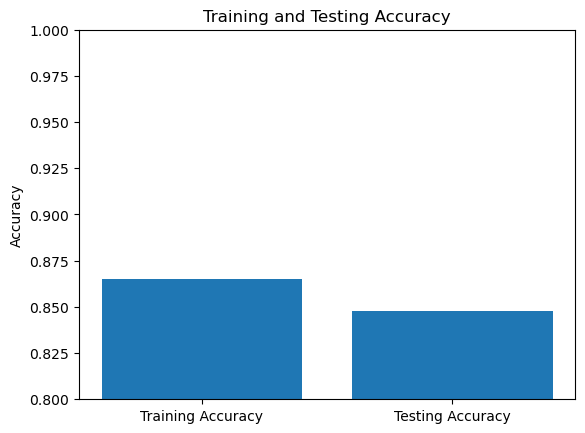

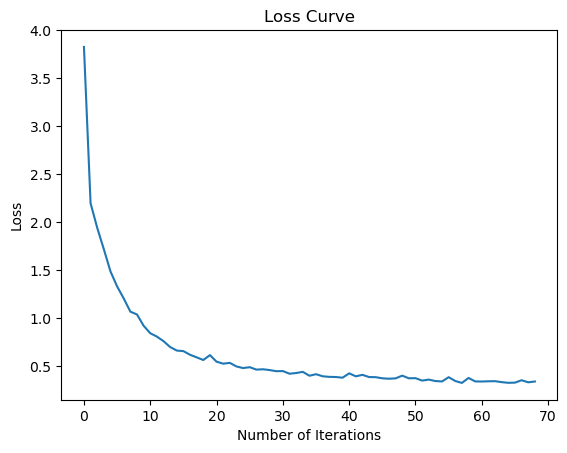

In [6]:
# Initialize the MLPClassifier
multiLayerPerceptron2 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
"""MLPClassifier is a function that utilizes a multi layer perceptron to perform classification, hyperparameters such as the number of 
hidden layers and iterations may be specified to more finely tune the algorithm."""

# Train the model
multiLayerPerceptron2.fit(train_X_normalized2, train_Y.values.ravel()) 

multiLayerPerceptron_scores2 = cross_val_score(multiLayerPerceptron2, test_X_normalized2, test_Y.values.ravel(), cv=10)

# Evaluate the model
training_accuracy2 = multiLayerPerceptron2.score(train_X_normalized2, train_Y.values.ravel())
testing_accuracy2 = multiLayerPerceptron2.score(test_X_normalized2, test_Y.values.ravel())

print('Training Accuracy:', training_accuracy2)
print('Testing Accuracy:', testing_accuracy2)

plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy2, testing_accuracy2])
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.ylim([0.8, 1.0])
plt.show()

# Assuming multiLevelPerceptron has been trained as before
plt.plot(multiLayerPerceptron2.loss_curve_)
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [7]:
ttest_ind(multiLayerPerceptron_scores,multiLayerPerceptron_scores2)
"""ttest_ind is function that compares 2 independant samples to identify if they are significantly different, using a t-test. It returns
the test statistic alongside the p-value it can be compared against and the deggrees of freedom."""

'ttest_ind is function that compares 2 independant samples to identify if they are significantly different, using a t-test. It returns\nthe test statistic alongside the p-value it can be compared against and the deggrees of freedom.'

The hypothesis H0 which was rejected, was the hypothesis that there was no significant change in accuracy between the model using the normal range and the model using the range 10,15. The p-value affects this decision significantly since any metric that exceeds this value provides statistically sufficient evidence of change. Therefore, use of a different p-value may result in a different hypothesis being accepted which vastly alters the measured differences between the 2 models. 